In [1]:
# importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')

# set the max columns to none
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# customer ID anyway have not any relevance with target column and hence worth of droping it

df.drop('customerID',axis=1,inplace=True)

In [5]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [6]:
df['SeniorCitizen']=df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [7]:
# in total charges there either misplaced value or missing value have to treat it first

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='TotalCharges', ylabel='Density'>

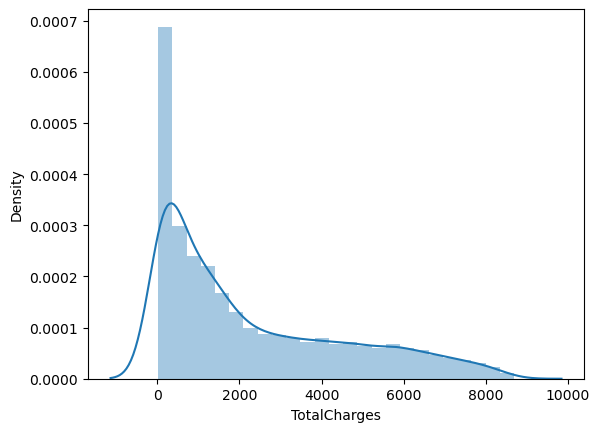

In [10]:
sns.distplot(df['TotalCharges'])

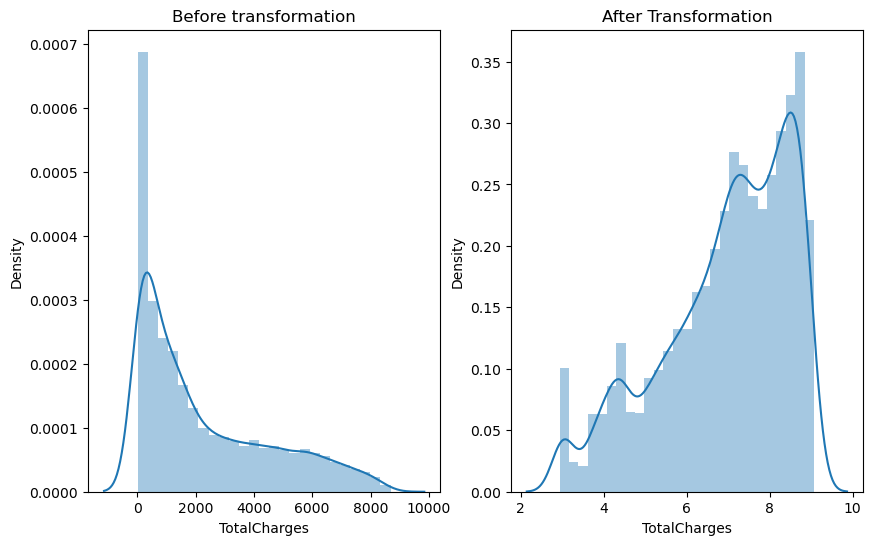

In [11]:
transformed_data_total_charges = np.log(df.TotalCharges)

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.distplot(df.TotalCharges)
plt.title("Before transformation")

plt.subplot(1,2,2)
sns.distplot(transformed_data_total_charges)
plt.title("After Transformation")

plt.show()

In [12]:
# since data is skewed to left side we will fill all the missing value by median

In [13]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [14]:
# Calculate the median of the non-null values in the column
median_value = df['TotalCharges'].median()

# Fill the null values with the calculated median value
df['TotalCharges'].fillna(median_value, inplace=True)

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [17]:
df.shape

(7043, 20)

In [18]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0.5, 1.0, 'Churn Distribution')

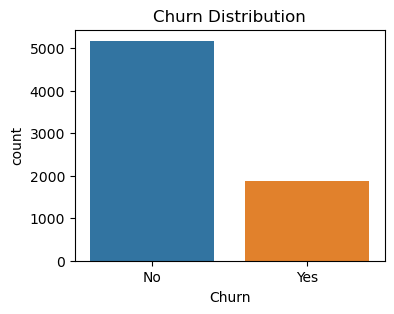

In [19]:
plt.figure(figsize=(4,3))
sns.countplot(x=df['Churn'],order=df['Churn'].value_counts().index)
plt.title("Churn Distribution")

### Since Majority customer are non churn , hence given data set is moderately imbalance

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

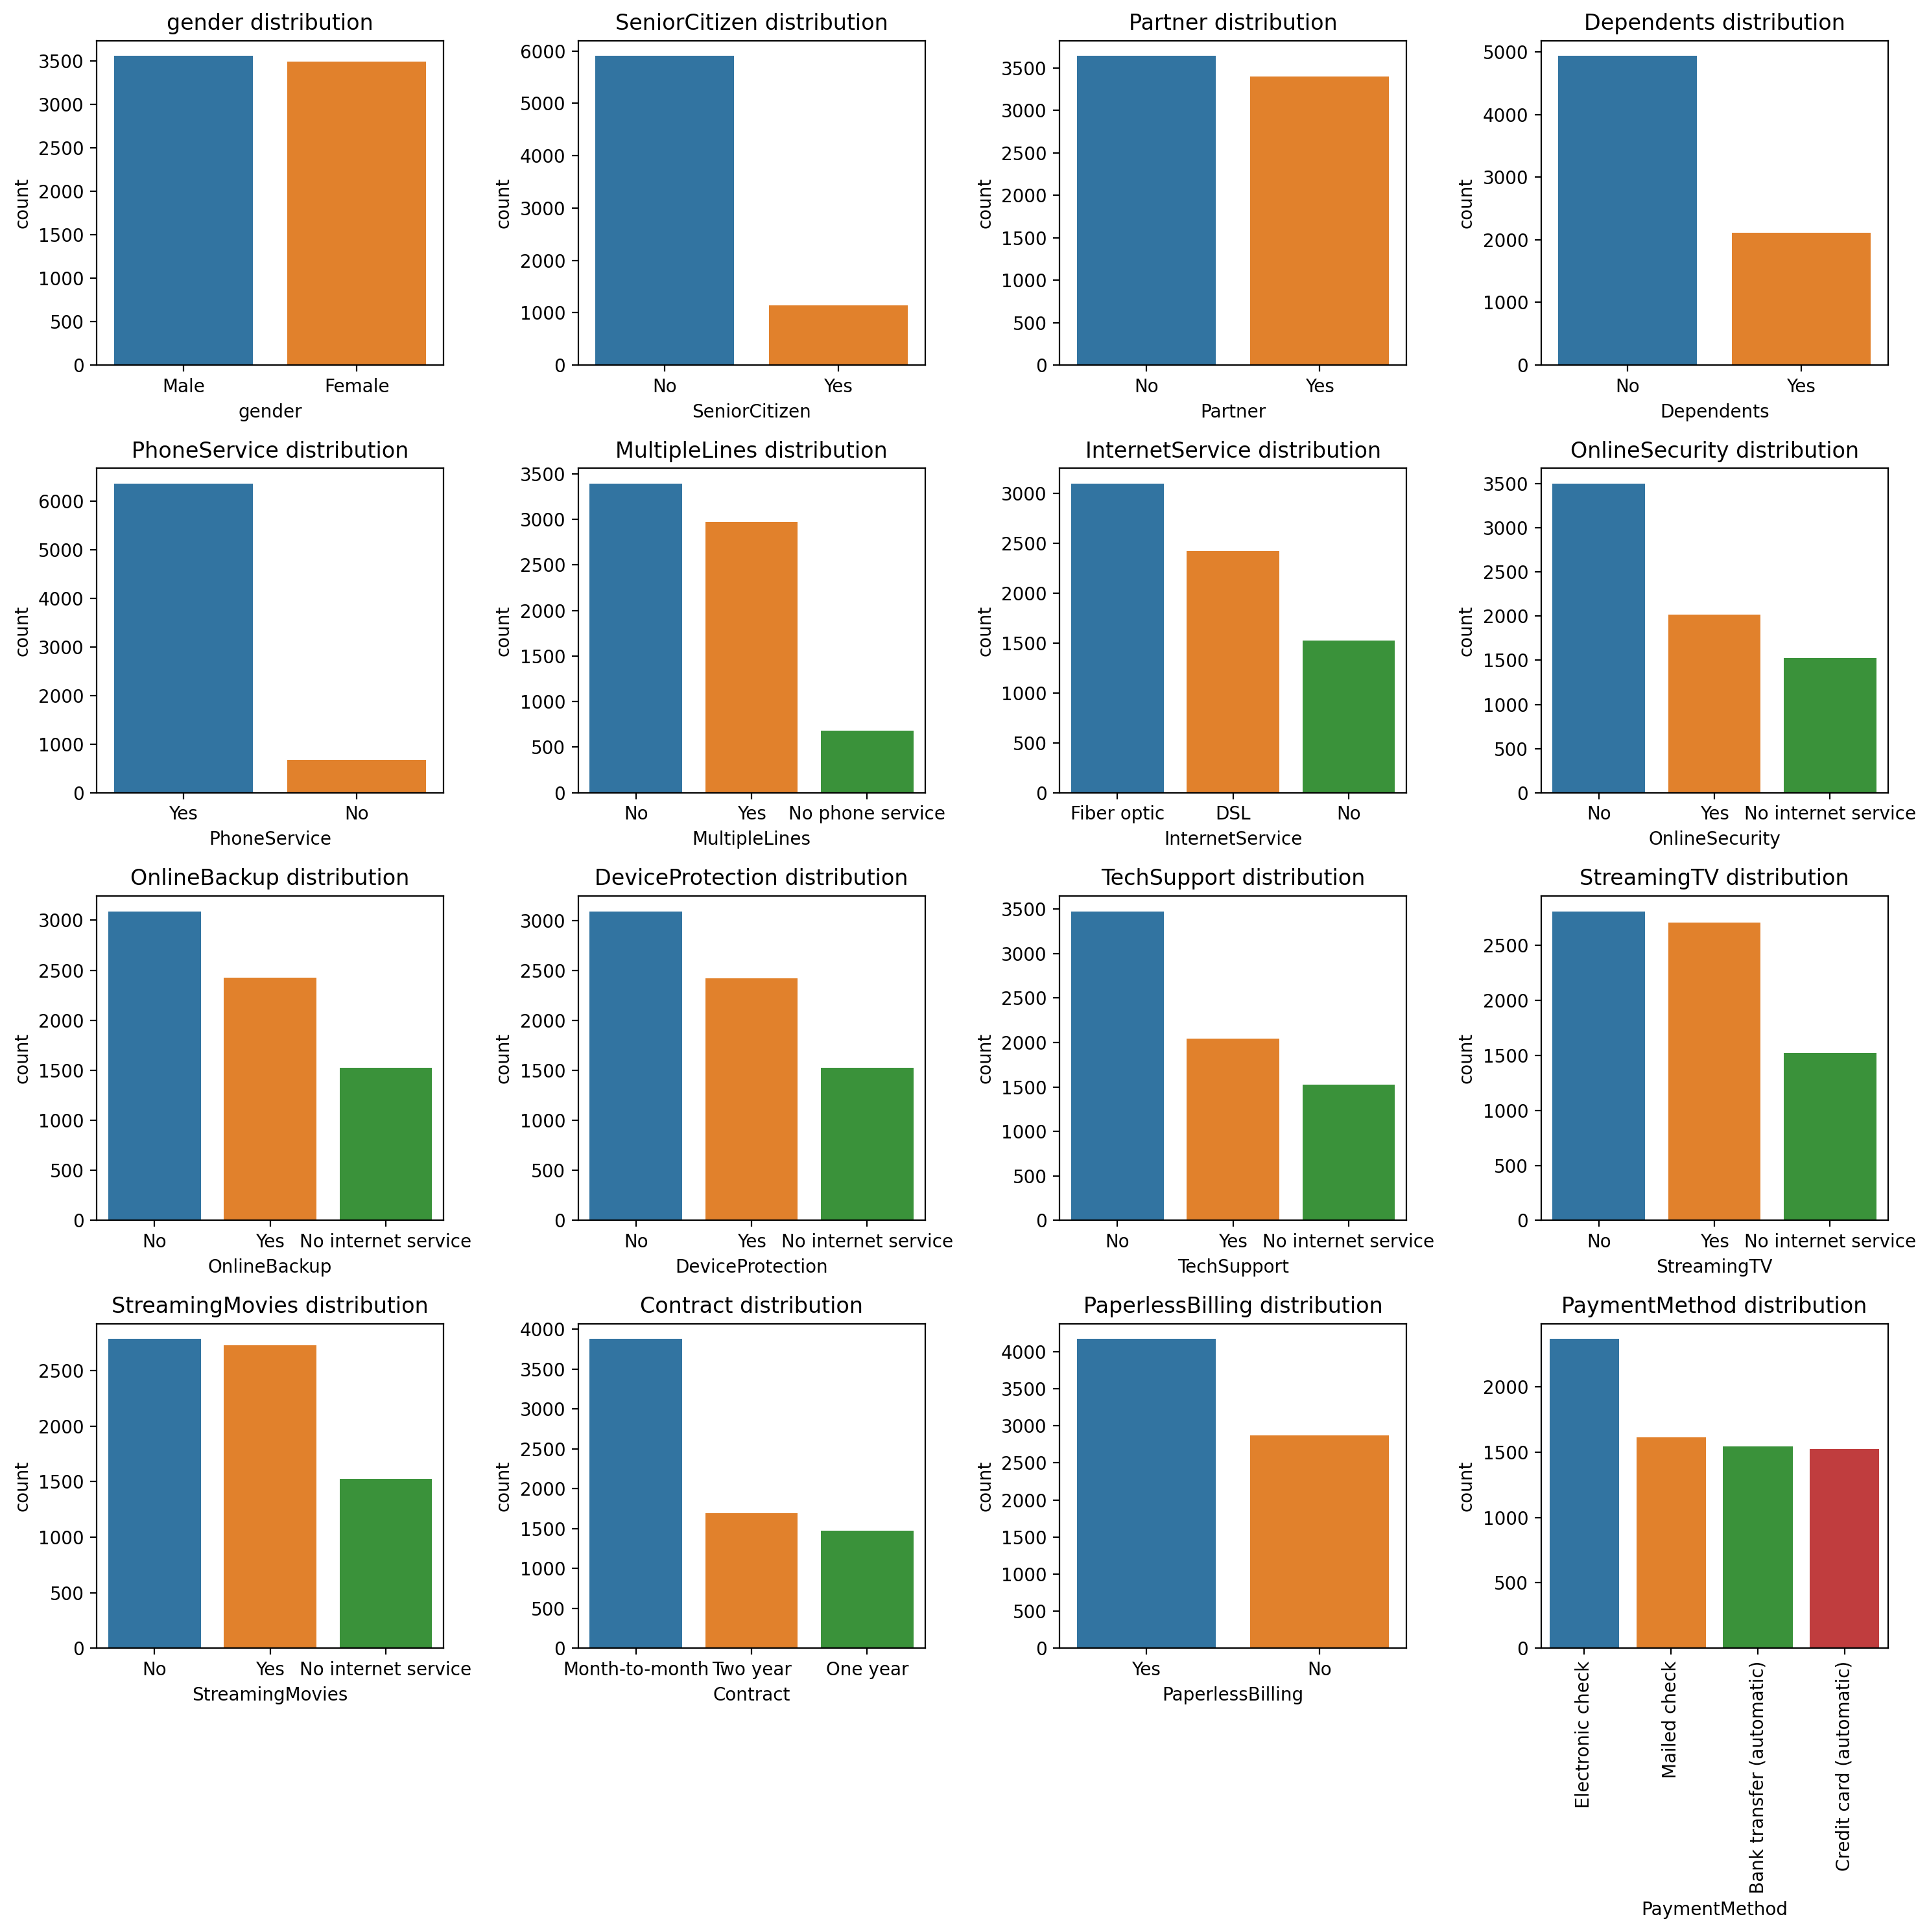

In [21]:
plt.figure(figsize=(15,15),dpi=200)

plt.subplot(4,4,1)
sns.countplot(x=df['gender'],order=df['gender'].value_counts().index)
plt.title('gender distribution')
#plt.xticks(rotation=90)

plt.subplot(4,4,2)
sns.countplot(x=df['SeniorCitizen'],order=df['SeniorCitizen'].value_counts().index)
plt.title('SeniorCitizen distribution')
#plt.xticks(rotation=90)

plt.subplot(4,4,3)
sns.countplot(x=df['Partner'],order=df['Partner'].value_counts().index)
plt.title('Partner distribution')
#plt.xticks(rotation=90)

plt.subplot(4,4,4)
sns.countplot(x=df['Dependents'],order=df['Dependents'].value_counts().index)
plt.title('Dependents distribution')

#==================================================================================================

plt.subplot(4,4,5)
sns.countplot(x=df['PhoneService'],order=df['PhoneService'].value_counts().index)
plt.title('PhoneService distribution')

plt.subplot(4,4,6)
sns.countplot(x=df['MultipleLines'],order=df['MultipleLines'].value_counts().index)
plt.title('MultipleLines distribution')

plt.subplot(4,4,7)
sns.countplot(x=df['InternetService'],order=df['InternetService'].value_counts().index)
plt.title('InternetService distribution')

plt.subplot(4,4,8)
sns.countplot(x=df['OnlineSecurity'],order=df['OnlineSecurity'].value_counts().index)
plt.title('OnlineSecurity distribution')

#===================================================================================================

plt.subplot(4,4,9)
sns.countplot(x=df['OnlineBackup'],order=df['OnlineBackup'].value_counts().index)
plt.title('OnlineBackup distribution')

plt.subplot(4,4,10)
sns.countplot(x=df['DeviceProtection'],order=df['DeviceProtection'].value_counts().index)
plt.title('DeviceProtection distribution')

plt.subplot(4,4,11)
sns.countplot(x=df['TechSupport'],order=df['TechSupport'].value_counts().index)
plt.title('TechSupport distribution')

plt.subplot(4,4,12)
sns.countplot(x=df['StreamingTV'],order=df['StreamingTV'].value_counts().index)
plt.title('StreamingTV distribution')
#================================================================================================

plt.subplot(4,4,13)
sns.countplot(x=df['StreamingMovies'],order=df['StreamingMovies'].value_counts().index)
plt.title('StreamingMovies distribution')

plt.subplot(4,4,14)
sns.countplot(x=df['Contract'],order=df['Contract'].value_counts().index)
plt.title('Contract distribution')

plt.subplot(4,4,15)
sns.countplot(x=df['PaperlessBilling'],order=df['PaperlessBilling'].value_counts().index)
plt.title('PaperlessBilling distribution')

plt.subplot(4,4,16)
sns.countplot(x=df['PaymentMethod'],order=df['PaymentMethod'].value_counts().index)
plt.title('PaymentMethod distribution')
plt.xticks(rotation=90)

plt.tight_layout()

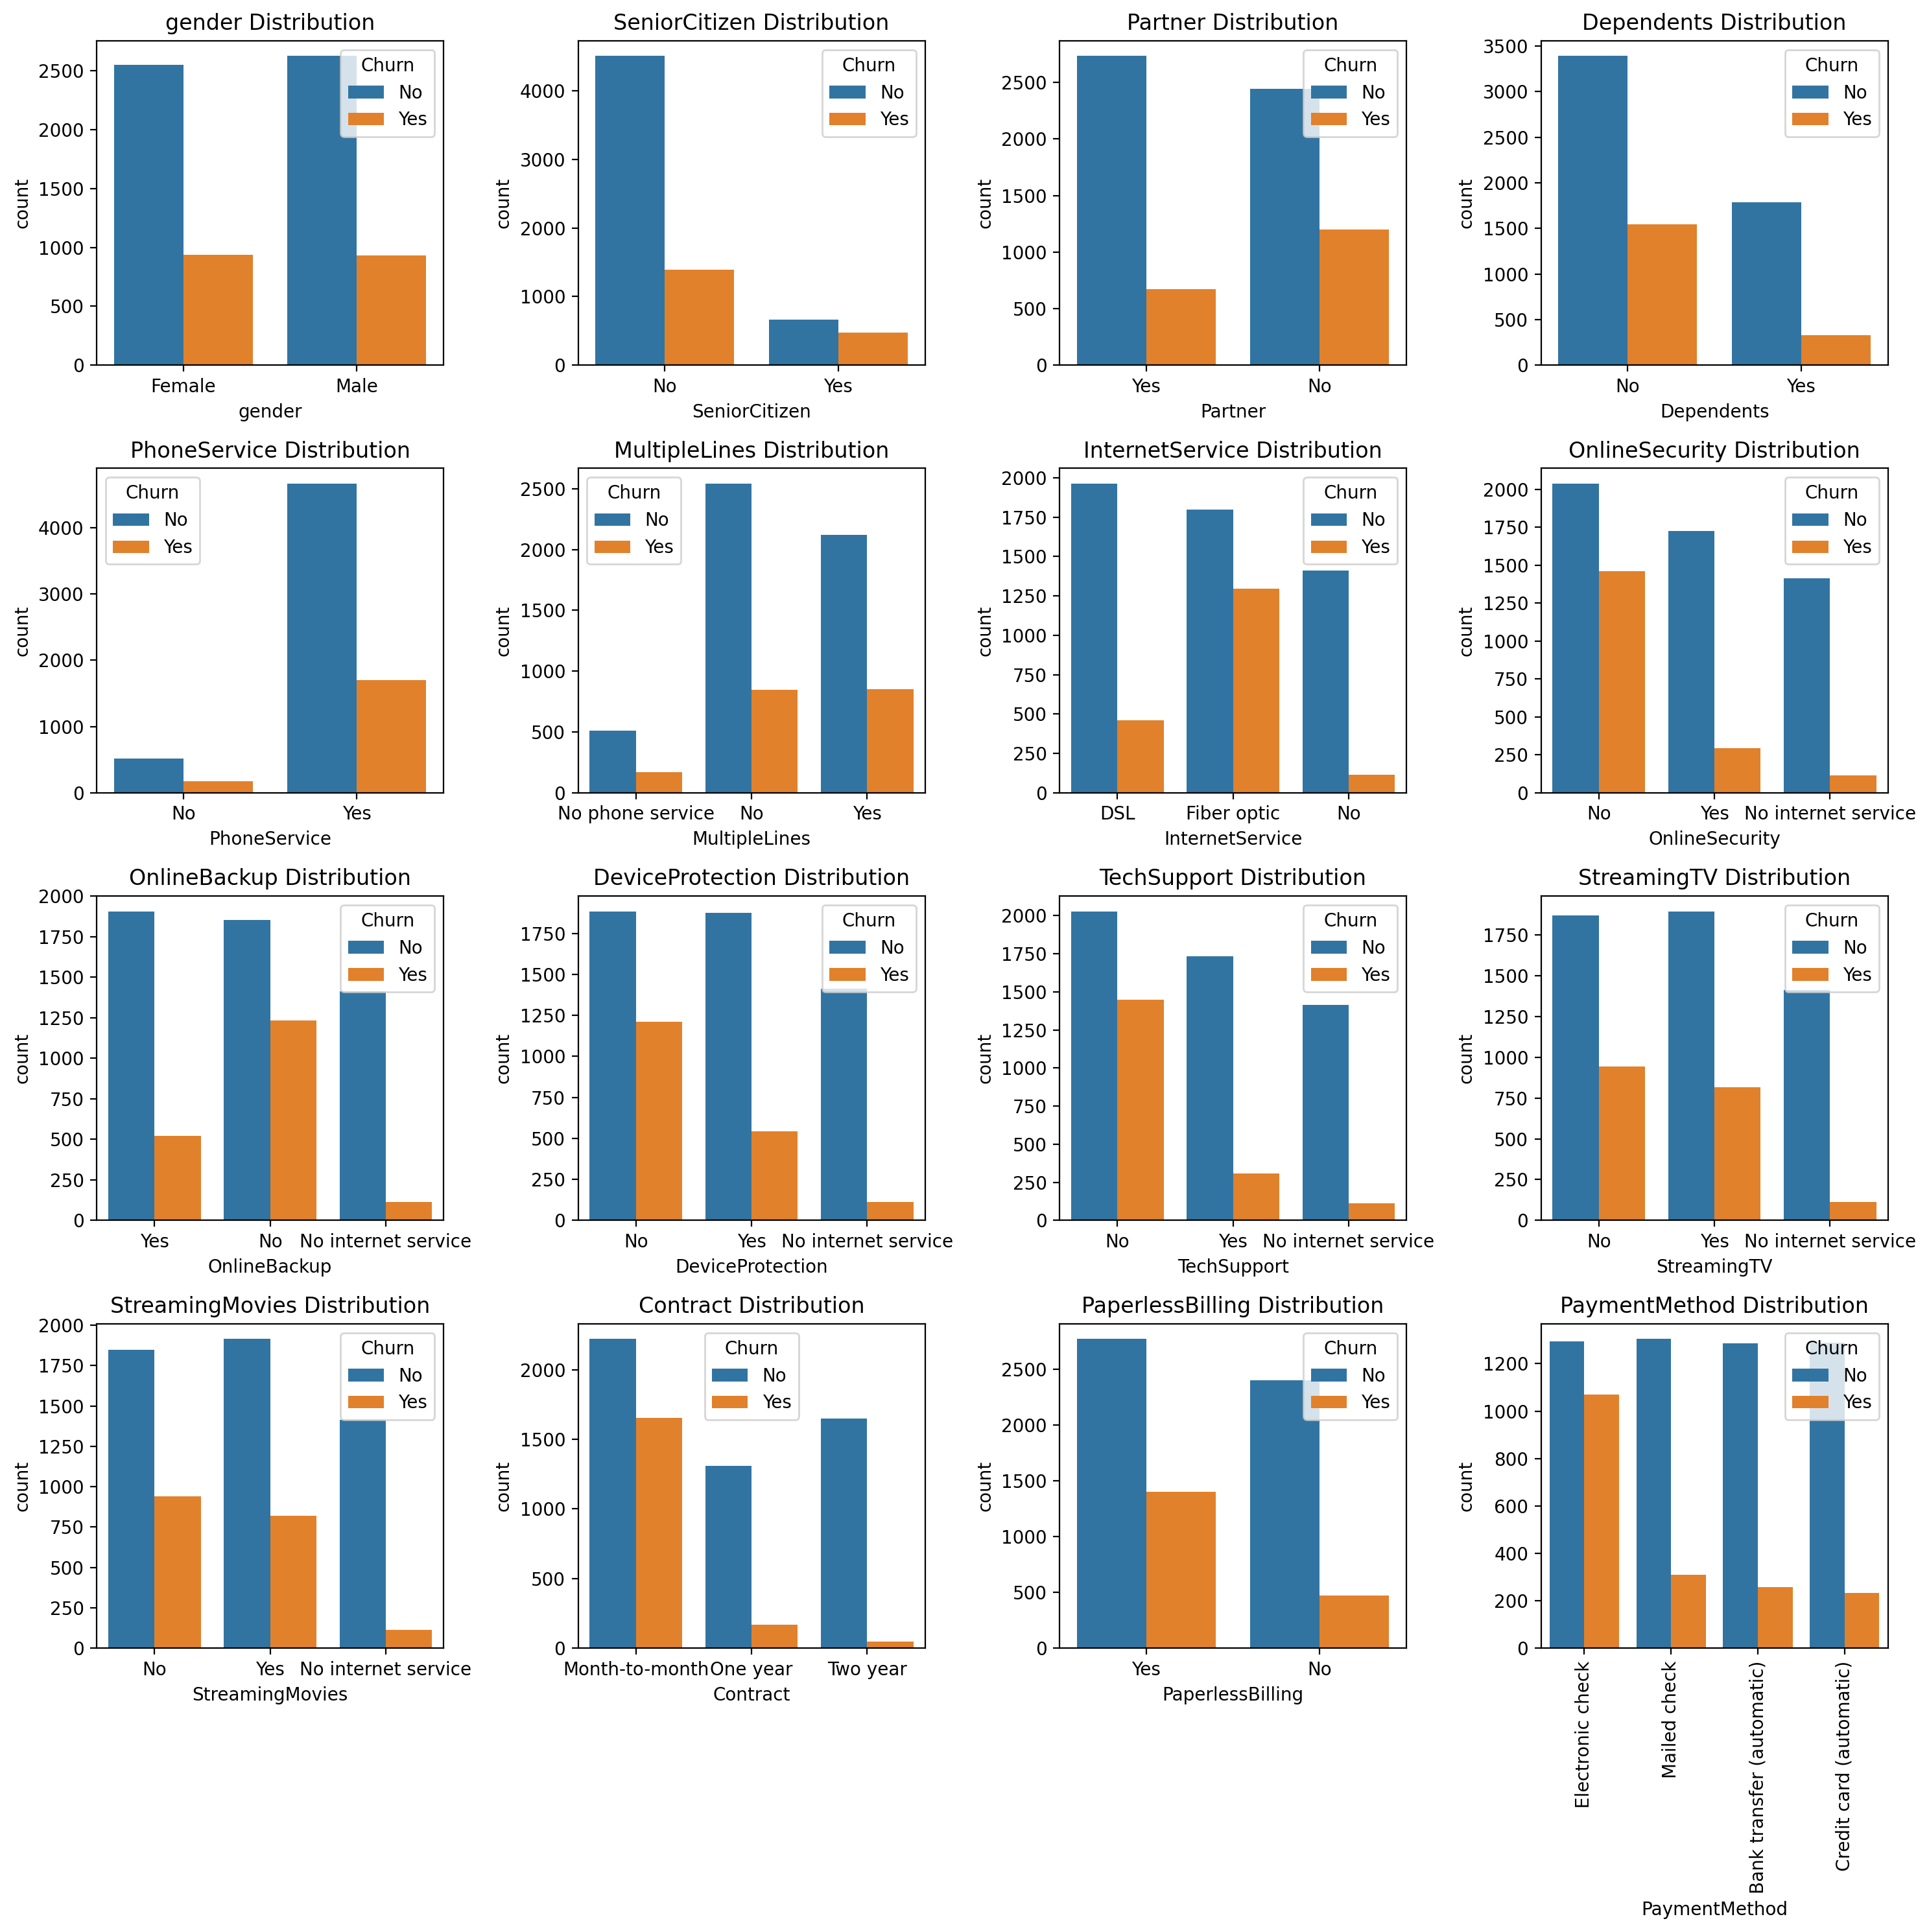

In [22]:
plt.figure(figsize=(15,15),dpi=200)

plt.subplot(4,4,1)
sns.countplot(data=df, x="gender", hue="Churn")
plt.title("gender Distribution")

plt.subplot(4,4,2)
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.title("SeniorCitizen Distribution")

plt.subplot(4,4,3)
sns.countplot(data=df, x="Partner", hue="Churn")
plt.title("Partner Distribution")

plt.subplot(4,4,4)
sns.countplot(data=df, x="Dependents", hue="Churn")
plt.title("Dependents Distribution")

#==================================================================================================

plt.subplot(4,4,5)
sns.countplot(data=df, x="PhoneService", hue="Churn")
plt.title("PhoneService Distribution")

plt.subplot(4,4,6)
sns.countplot(data=df, x="MultipleLines", hue="Churn")
plt.title("MultipleLines Distribution")

plt.subplot(4,4,7)
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("InternetService Distribution")

plt.subplot(4,4,8)
sns.countplot(data=df, x="OnlineSecurity", hue="Churn")
plt.title("OnlineSecurity Distribution")

#===================================================================================================

plt.subplot(4,4,9)
sns.countplot(data=df, x="OnlineBackup", hue="Churn")
plt.title("OnlineBackup Distribution")

plt.subplot(4,4,10)
sns.countplot(data=df, x="DeviceProtection", hue="Churn")
plt.title("DeviceProtection Distribution")

plt.subplot(4,4,11)
sns.countplot(data=df, x="TechSupport", hue="Churn")
plt.title("TechSupport Distribution")

plt.subplot(4,4,12)
sns.countplot(data=df, x="StreamingTV", hue="Churn")
plt.title("StreamingTV Distribution")
#================================================================================================

plt.subplot(4,4,13)
sns.countplot(data=df, x="StreamingMovies", hue="Churn")
plt.title("StreamingMovies Distribution")

plt.subplot(4,4,14)
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Distribution")

plt.subplot(4,4,15)
sns.countplot(data=df, x="PaperlessBilling", hue="Churn")
plt.title("PaperlessBilling Distribution")

plt.subplot(4,4,16)
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("PaymentMethod Distribution")
plt.xticks(rotation=90)

plt.tight_layout()

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Analysis of continuous data

In [24]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [25]:
# there are some client who has zero tenure so they dont add any substantial informatin in the dataset and worth of drop it

In [26]:
mask=df['tenure']==0

In [27]:
df.drop(df[mask].index,inplace= True)

Text(0.5, 1.0, 'TotalCharges Distribution')

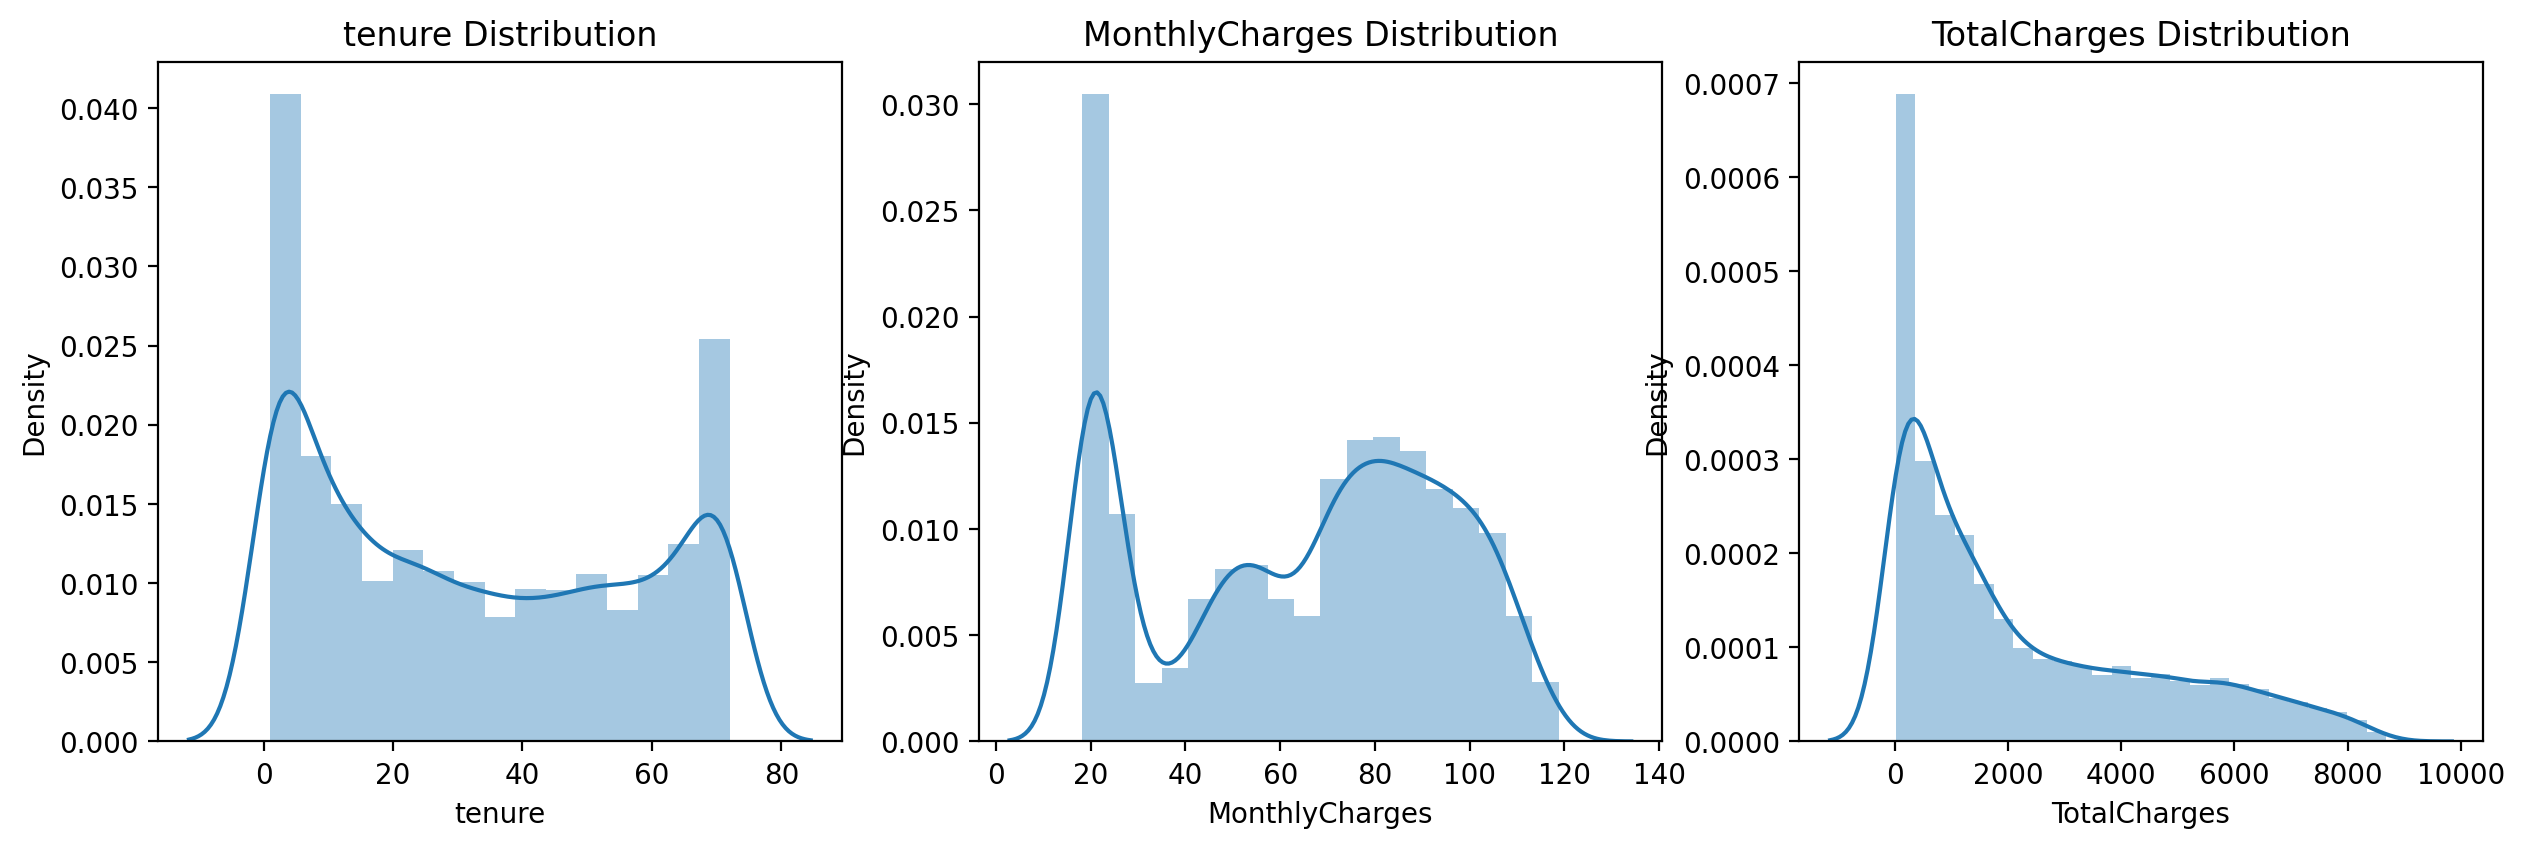

In [28]:
plt.figure(figsize=(15,15),dpi=200)

plt.subplot(3,3,1)
sns.distplot(df.tenure)
plt.title("tenure Distribution")

plt.subplot(3,3,2)
sns.distplot(df.MonthlyCharges)
plt.title("MonthlyCharges Distribution")

plt.subplot(3,3,3)
sns.distplot(df.TotalCharges)
plt.title("TotalCharges Distribution")

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [32]:
# replacing values
df['gender'].replace(['Female', 'Male'],[0, 1], inplace=True)

df['SeniorCitizen'].replace(['No', 'Yes'],[0, 1], inplace=True)

df['Partner'].replace(['No', 'Yes'],[0, 1], inplace=True)

df['Dependents'].replace(['No', 'Yes'],[0, 1], inplace=True)

df['PhoneService'].replace(['No', 'Yes'],[0, 1], inplace=True)

df['MultipleLines'].replace(['No', 'Yes','No phone service'],[0, 1, 2], inplace=True)

df['InternetService'].replace(['No', 'DSL','Fiber optic'],[0, 1,2], inplace=True)

df['OnlineSecurity'].replace(['No internet service', 'Yes','No'],[0, 1,2], inplace=True)

df['OnlineBackup'].replace(['No internet service', 'Yes','No'],[0, 1,2], inplace=True)

df['DeviceProtection'].replace(['No internet service', 'Yes','No'],[0, 1,2], inplace=True)

df['TechSupport'].replace(['No internet service', 'Yes','No'],[0, 1,2], inplace=True)

df['StreamingTV'].replace(['No internet service', 'Yes','No'],[0, 1,2], inplace=True)

df['StreamingMovies'].replace(['No internet service', 'Yes','No'],[0, 1,2], inplace=True)

df['Contract'].replace(['One year', 'Two year','Month-to-month'],[0, 1,2], inplace=True)

df['PaperlessBilling'].replace(['No','Yes'],[0, 1], inplace=True)

df['PaymentMethod'].replace(['Credit card (automatic)', 'Bank transfer (automatic)','Mailed check','Electronic check'],[0, 1,2,4], inplace=True)

df['Churn'].replace(['No', 'Yes'],[0, 1], inplace=True)


In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,2,1,2,2,2,2,2,1,4,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,2,1,2,2,2,0,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,2,2,2,2,2,1,2,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,2,1,1,2,2,0,0,1,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,2,2,2,2,2,2,2,1,4,70.70,151.65,1


### Splitting data into Features and Target

In [34]:
X=df.drop('Churn',axis=1)
Y=df['Churn']

In [35]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,2,1,2,1,2,2,2,2,2,1,4,29.85,29.85
1,1,0,0,0,34,1,0,1,1,2,1,2,2,2,0,0,2,56.95,1889.50
2,1,0,0,0,2,1,0,1,1,1,2,2,2,2,2,1,2,53.85,108.15
3,1,0,0,0,45,0,2,1,1,2,1,1,2,2,0,0,1,42.30,1840.75
4,0,0,0,0,2,1,0,2,2,2,2,2,2,2,2,1,4,70.70,151.65


In [36]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Splitting data into train and test data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=41)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(7032, 19) (5625, 19) (1407, 19)


### feature scaling on train and test data

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
X_train_std=scaler.fit_transform(X_train)

In [43]:
X_test_std=scaler.transform(X_test)

### Model Building

In [44]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [45]:
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression(random_state=41)

logit.fit(X_train_std,Y_train)

logit_y_pred_train=logit.predict(X_train_std)

logit_y_pred_train_acc=accuracy_score(Y_train,logit_y_pred_train)

print('Training accuracy for Logistic regression',round(logit_y_pred_train_acc,2))
print('-'*100)

logit_y_pred_test=logit.predict(X_test_std)

logit_y_pred_test_acc=accuracy_score(Y_test,logit_y_pred_test)

print('Testing accuracy for Logistic regression',round(logit_y_pred_test_acc,2))
print('='*100)

Training accuracy for Logistic regression 0.8
----------------------------------------------------------------------------------------------------
Testing accuracy for Logistic regression 0.82


In [46]:
lr_pred= logit.predict(X_test_std)
report = classification_report(Y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1033
           1       0.68      0.58      0.63       374

    accuracy                           0.82      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407



since type 2 error is more dangerous as customer is churn but it predicted as not churn we will consider recall as evaluation matrix

here recall value is too less for class 1 we will try data balancing

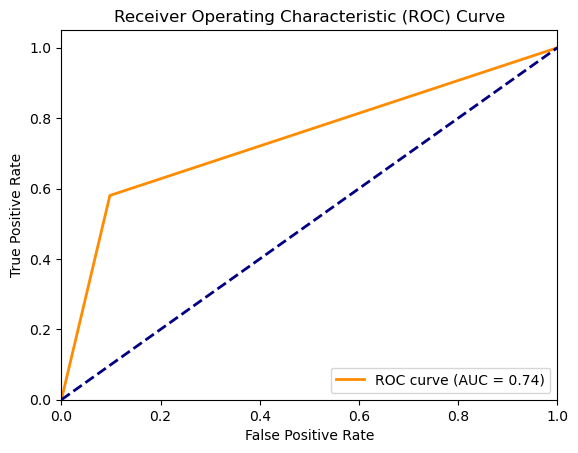

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, lr_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### We will try to balance the data by smote technique

In [48]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
Y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [51]:
smote=SMOTE(sampling_strategy='minority')
X_sm,Y_sm=smote.fit_resample(X_train_std,Y_train)

In [52]:
Y_sm.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.2,stratify=Y_sm,random_state=41)

In [54]:
Y_test.value_counts()

0    826
1    826
Name: Churn, dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression(random_state=41)

logit.fit(X_train,Y_train)

logit_y_pred_train=logit.predict(X_train)

logit_y_pred_train_acc=accuracy_score(Y_train,logit_y_pred_train)

print('Training accuracy for Logistic regression',round(logit_y_pred_train_acc,2))
print('-'*100)

logit_y_pred_test=logit.predict(X_test)

logit_y_pred_test_acc=accuracy_score(Y_test,logit_y_pred_test)

print('Testing accuracy for Logistic regression',round(logit_y_pred_test_acc,2))
print('='*100)

Training accuracy for Logistic regression 0.77
----------------------------------------------------------------------------------------------------
Testing accuracy for Logistic regression 0.77


In [56]:
lr_pred= logit.predict(X_test)
report = classification_report(Y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       826
           1       0.75      0.81      0.78       826

    accuracy                           0.77      1652
   macro avg       0.77      0.77      0.77      1652
weighted avg       0.77      0.77      0.77      1652



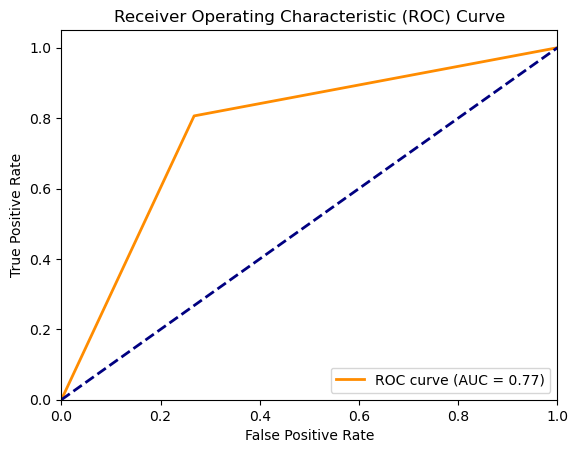

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, lr_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()